In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import the clean ds
%store -r ds_clean

In [4]:
ds_clean.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [5]:
ds_clean.shape

(388, 9)

# Visualize general data

### Distance

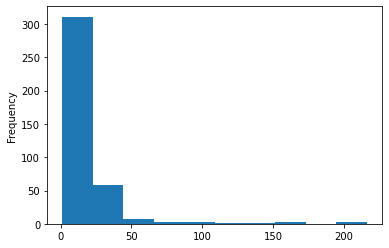

In [6]:
ds_clean['distance'].plot.hist()
plt.show()

As we can see, most distances are shorter than 50 km

### Consume

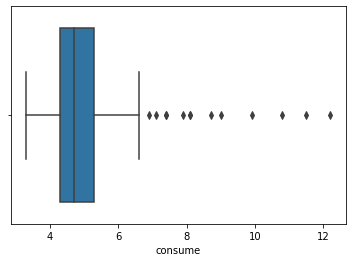

In [7]:
sns.boxplot(x=ds_clean['consume']);

The liters consumed per use are mainly inbetween 4 and 5,5

### Speed

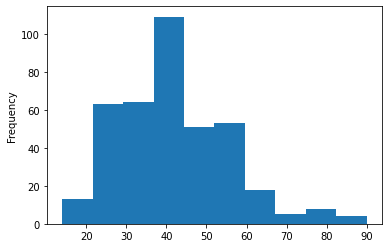

In [8]:
ds_clean['speed'].plot.hist()
plt.show()

In [10]:
temp_m = ds_clean['speed'].mean()
print('The average total speed is',temp_m,'km/h')

The average total speed is 41.92783505154639 km/h


### Temp inside vs temp outside

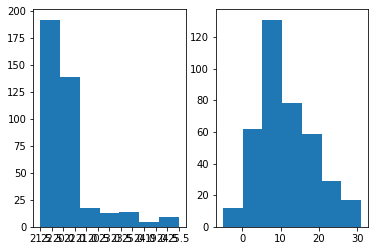

In [9]:
plt.subplot(1, 2, 1) 
plt.hist(ds_clean['temp_inside'],bins=7)
plt.subplot(1, 2, 2)
plt.hist(ds_clean['temp_outside'],bins=7)
plt.show()

### Gas type

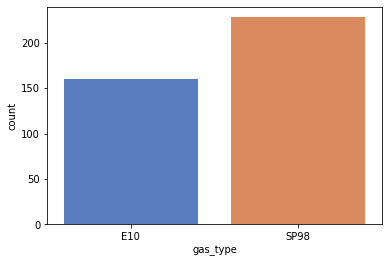

In [10]:
sns.countplot(x="gas_type", data=ds_clean, palette= ('muted'));

SP98 has been used more than E10 as a gas option

# Lets start adding conditions

## 0. Before graphing

In [51]:
#In order to work with these values, we need to create a new data frame
df_sp= ds_clean.drop(ds_clean[ds_clean["gas_type"] == "E10"].index)
df_sp.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
44,5.4,3.3,32,21.5,7,SP98,0,0,0
45,2.0,9.9,21,21.5,4,SP98,0,0,0
46,14.2,5.1,32,21.5,7,SP98,0,0,0
47,16.0,4.9,25,21.5,8,SP98,0,0,0
48,11.8,4.9,25,21.5,11,SP98,0,0,0


In [52]:
df_e10= ds_clean.drop(ds_clean[ds_clean["gas_type"] == "SP98"].index)
df_e10.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [53]:
#Compare the shape of each df
print(df_sp.shape)
print(df_e10.shape)
#We have more data for the e10 type of gas

(228, 9)
(160, 9)


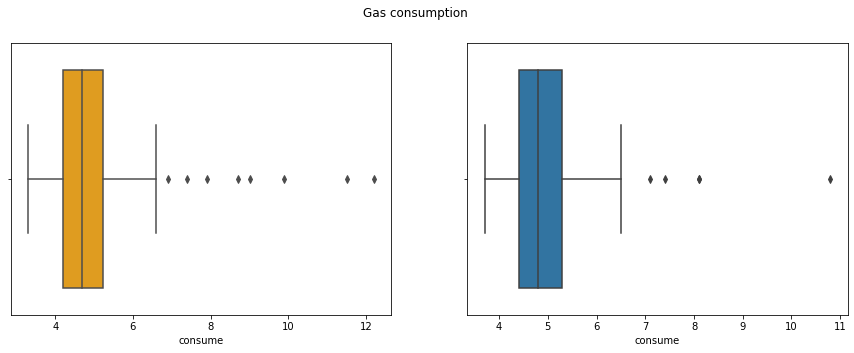

In [139]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(figsize=(15, 5))

fig.suptitle('Gas consumption')

plt.subplot(1,2,1)
sns.boxplot(data=df_sp, x='consume',color='orange');
plt.subplot(1,2,2)
sns.boxplot(data=df_e10, x='consume');

Consumption values for sp98 are more spread out that for e10

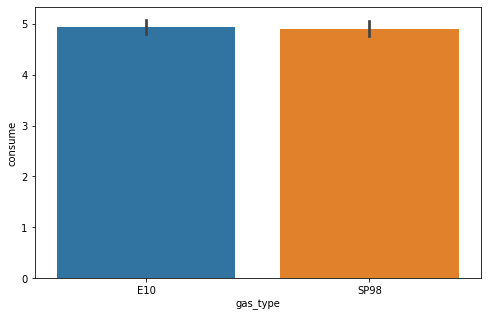

In [54]:
#In order to have a general view;
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "gas_type", y = "consume", ax=ax, data=ds_clean);

In [55]:
# The amount of gas consumed looks almost the same
mean_gas_e10 = df_e10['consume'].mean()
mean_gas_sp = df_sp['consume'].mean()

print('The average gas consumed with type e10 is', mean_gas_e10,'and with type sp is',mean_gas_sp)

The average gas consumed with type e10 is 4.93125 and with type sp is 4.899122807017544


## 1. Lets start comparing values

### Distance/Speed - Consume

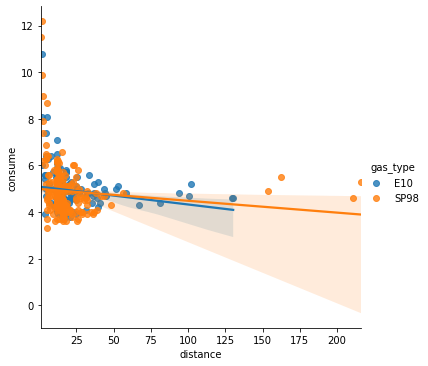

In [56]:
sns.lmplot(x="distance", y="consume", hue="gas_type", data=ds_clean);

In [67]:
max_d_sp = df_sp['distance'].max()
max_d_e10 = df_e10['distance'].max()

print('The max distance using e10 is', max_d_e10, 'and using sp98',max_d_sp)

The max distance using e10 is 130.3 and usind sp98 216.1


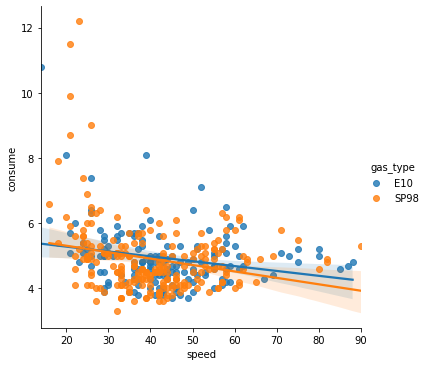

In [60]:
sns.lmplot(x="speed", y="consume", hue="gas_type", data=ds_clean);

In [70]:
max_s_sp = df_sp['speed'].max()
max_s_e10 = df_e10['speed'].max()

print('The max speed using e10 is', max_s_e10, 'km/h and using sp98',max_s_sp,'km/h')

The max speed using e10 is 88 km/h and using sp98 90 km/h


In this last plot, we can see how the consume varies more with SP98 gastype, but as the speed increases SP98 consumes less than E10

### Temp - consume

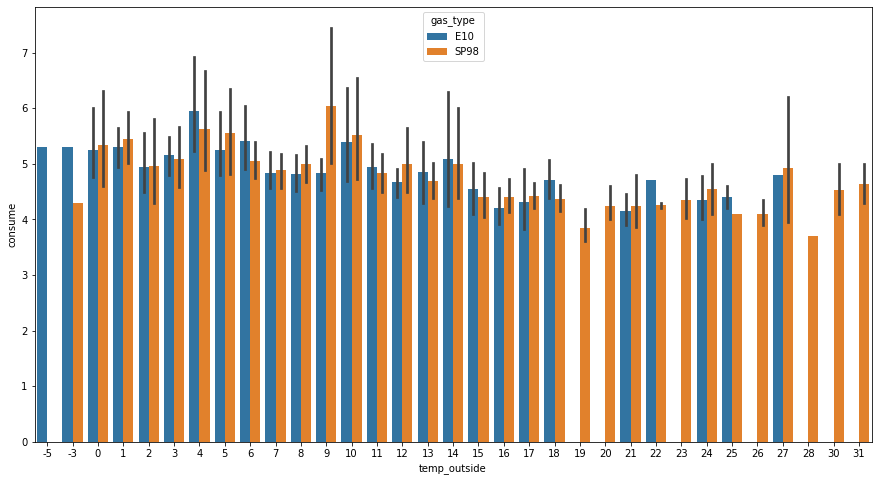

In [72]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "temp_outside", y = "consume",hue='gas_type', ax=ax, data=ds_clean);

We can detect a slight decrease of gas consumption when the temp outside is inbetween 15 and 21 degrees

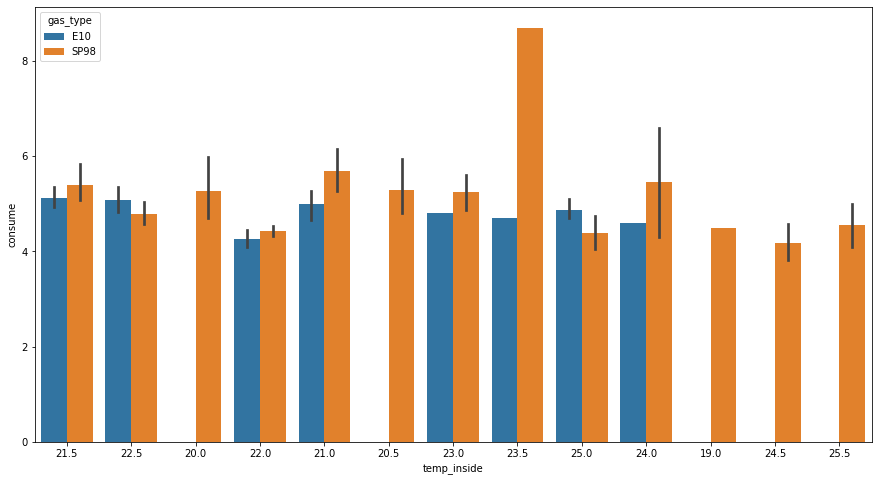

In [62]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "temp_inside", y = "consume",hue='gas_type', ax=ax, data=ds_clean);

Even though the difference is not that big, SP98 consumes more most of the time

### AC/rain/sun - consume

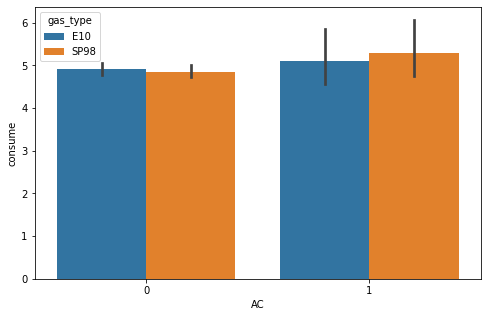

In [63]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "AC", y = "consume",hue='gas_type', ax=ax, data=ds_clean);

The car consumes more SP98 gas when the AC is on 

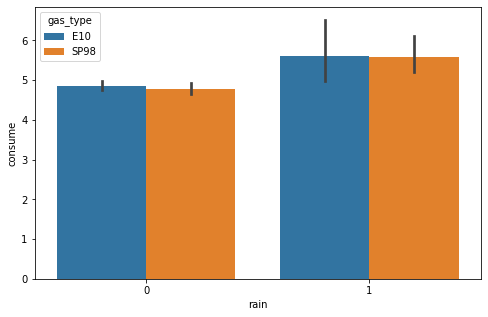

In [64]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "rain", y = "consume",hue='gas_type', ax=ax, data=ds_clean);

It consumes same amount per gas type when its rainning

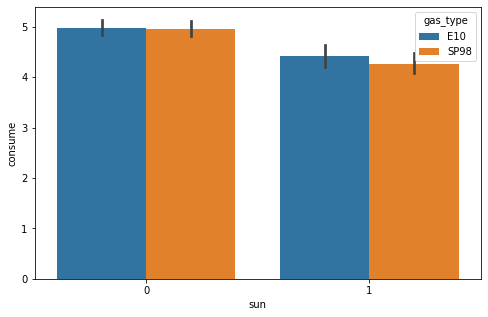

In [65]:
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "sun", y = "consume",hue='gas_type', ax=ax, data=ds_clean);

It consumes more e10 gas if its sunny

When no event is going on (neither rain,sun or ac) e10 conusmes more than sp98

# Conclusions

### General (no division by gas type)
- Most distances are shorter than 50 km
- The car consumes in between 4 and 5.5 L on average
- The max speed is 90km/h but an average speed is 42 km/h
- In this df SP98 is used 228 times and E10 only 160 (This could be a problem)

### E10 VS SP98
- Gas consumption values are more spread out in E10
- In average e10 consumes MORE THAN sp98, being 4.93 against 4.889
- The average speed is 42 km/h and the max 90km/h
- The max distance travelled with e10 is 130 km and with sp98 is 216, when can see in the chart how if the distance increases, sp98 progressively consumes more, but this could also be since we are missing a lot of values for 'consume' of e10 gas type with bigger distances
- The max speed is very similar between both gas types, and from the plot we extract that as we increase the speed it reduces the consumption of gas for sp98 more than with e10
- Lastly, if it's raining or sunny, e10 the car consumes more while being e10 the gas type, on the other hand, if the AC is on it consumes more when using sp98